<a href="https://colab.research.google.com/github/Ramyrahmeni/DeepLearning/blob/main/Optimizers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experimenting Optmizers

## Momentum Based GD

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def func(x, y):
    return tf.sin(x) * tf.cos(y)

# Compute the gradient
def compute_gradient(x, y):
    with tf.GradientTape() as tape:
        tape.watch([x, y])
        z = func(x, y)
    return tape.gradient(z, [x, y])

# Initialize variables
x = tf.Variable(2.0, dtype=tf.float32)
y = tf.Variable(3.0, dtype=tf.float32)
learning_rate = 0.1
momentum = 0.9
num_iterations = 50

In [6]:
x_values = []
y_values = []
z_values = []

# Initialize minimum tracking
min_z = float('inf')  # Start with infinity as the initial min value
min_point = (None, None, None)  # To store the minimum point (x, y, z)

# Perform gradient descent
for i in range(num_iterations):
    gradients = compute_gradient(x, y)
    optimizer.apply_gradients(zip(gradients, [x, y]))

    # Store values
    x_values.append(x.numpy())
    y_values.append(y.numpy())
    z_value = func(x, y).numpy()
    z_values.append(z_value)

    # Check for minimum
    if z_value < min_z:
        min_z = z_value
        min_point = (x.numpy(), y.numpy(), min_z)

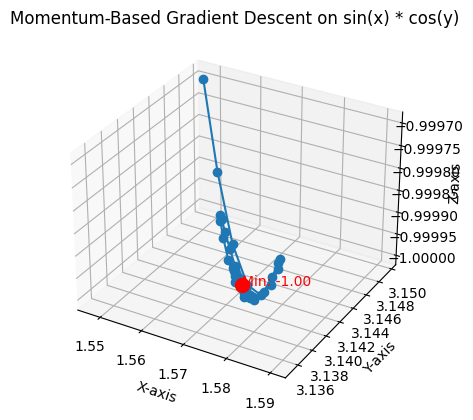

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_values, y_values, z_values, marker='o')
ax.scatter(min_point[0], min_point[1], min_point[2], color='red', s=100, label='Minimum Point')
ax.text(min_point[0], min_point[1], min_point[2], f'Min: {min_point[2]:.2f}', size=10, color='red', zorder=2)
ax.set_title('Momentum-Based Gradient Descent on sin(x) * cos(y)')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.show()

In [8]:
print(f'Minimum point: (x, y, z) = {min_point}')


Minimum point: (x, y, z) = (1.5708627, 3.141651, -1.0)


## From Adagrad to rms Prop : From Scratch implementation

### AdaGrad

In [9]:
import numpy as np

In [12]:
import numpy as np

class GradientDescentLinearRegression:
    """
    Linear Regression with gradient-based optimization.
    Parameters
    ----------
    learning_rate : float
        Learning rate for the gradient descent algorithm.
    max_iterations : int
        Maximum number of iteration for the gradient descent algorithm.
    eps : float
        Tolerance level for the Euclidean norm between model parameters in two
        consequitive iterations. The algorithm is stopped when the norm becomes
        less than the tolerance level.
    """

    def __init__(self, learning_rate=1, max_iterations=10000, eps=1e-6):
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.eps = eps

    def predict(self, X):
        """Returns predictions array of shape [n_samples,1]"""
        return np.dot(X, self.w.T)

    def cost(self, X, y):
        """Returns the value of the cost function as a scalar real number"""
        y_pred = self.predict(X)
        loss = (y - y_pred)**2
        return np.mean(loss)

    def grad(self, X, y):
        """Returns the gradient vector"""
        y_pred = self.predict(X)
        d_intercept = -2*sum(y - y_pred)                    # dJ/d w_0.
        d_x = -2*sum(X[:,1:] * (y - y_pred).reshape(-1,1))  # dJ/d w_i.
        g = np.append(np.array(d_intercept), d_x)           # Gradient.
        return g / X.shape[0]                               # Average over training samples.

    def adagrad(self, g):
        self.G += g**2                                     # Update cache.
        step = self.learning_rate / (np.sqrt(self.G + self.eps)) * g
        return step

    def fit(self, X, y, method = "adagrad", verbose = True):
        """
        Fit linear model with gradient descent.

        Parameters
        ----------
        X : numpy array or sparse matrix of shape [n_samples,n_predictors]
            Training data
        y : numpy array of shape [n_samples,1]
            Target values.
        method : string
                 Defines the variant of gradient descent to use.
                 Possible values: "standard", "adagrad".
        verbose: boolean
                 If True, print the gradient, parameters and the cost function
                 for each iteration.

        Returns
        -------
        self : returns an instance of self.
        """

        self.w = np.zeros(X.shape[1])                     # Initialization of params.
        if method == "adagrad":
            self.G = np.zeros(X.shape[1])                 # Initialization of cache for AdaGrad.
        w_hist = [self.w]                                 # History of params.
        cost_hist = [self.cost(X, y)]                     # History of cost.

        for iter in range(self.max_iterations):

            g = self.grad(X, y)                           # Calculate the gradient.
            if method == "standard":
                step = self.learning_rate * g             # Calculate standard gradient step.
            elif method == "adagrad":
                step = self.adagrad(g)                    # Calculate AdaGrad step.
            else:
                raise ValueError("Method not supported.")
            self.w = self.w - step                        # Update parameters.
            w_hist.append(self.w)                         # Save to history.

            J = self.cost(X, y)                           # Calculate the cost.
            cost_hist.append(J)                           # Save to history.

            if verbose:
                print(f"Iter: {iter}, gradient: {g}, params: {self.w}, cost: {J}")

            # Stop if update is small enough.
            if np.linalg.norm(w_hist[-1] - w_hist[-2]) < self.eps:
                break

        # Final updates before finishing.
        self.iterations = iter + 1                       # Due to zero-based indexing.
        self.w_hist = w_hist
        self.cost_hist = cost_hist
        self.method = method

        return self

Iter: 0, gradient: [-5.57624578 -3.11905923 -2.37330316], params: [0.1        0.09999999 0.09999999], cost: 7.242443669587184
Iter: 1, gradient: [-5.17607068 -2.89862429 -2.16324156], params: [0.1680319  0.1680748  0.16736428], cost: 6.5663915696462345
Iter: 2, gradient: [-4.90442997 -2.74895555 -2.02073712], params: [0.2222122  0.22231339 0.22062358], cost: 6.05604010573389
Iter: 3, gradient: [-4.68845083 -2.62993403 -1.9074835 ], params: [0.26820367 0.26837194 0.26554093], cost: 5.6422899390580366
Iter: 4, gradient: [-4.50538146 -2.52903249 -1.81152477], params: [0.30862739 0.30886894 0.30477783], cost: 5.293361856786259
Iter: 5, gradient: [-4.34469619 -2.44045511 -1.72733052], params: [0.34494737 0.34526702 0.33981897], cost: 4.991595118761261
Iter: 6, gradient: [-4.20051775 -2.36096555 -1.65181295], params: [0.3780788  0.3784806  0.37159175], cost: 4.72599821318626
Iter: 7, gradient: [-4.06917262 -2.28854095 -1.58304216], params: [0.40863881 0.40912626 0.40072121], cost: 4.48919066

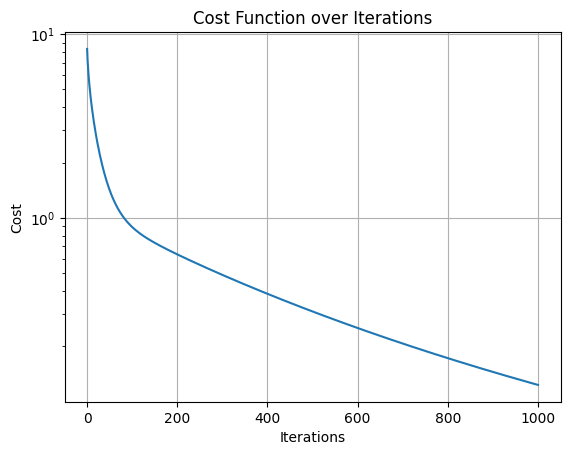

Final parameters: [ 2.16697814  1.92429865 -0.89705987]


In [13]:
np.random.seed(0)  # For reproducibility
X = np.random.rand(100, 2)  # 100 samples, 1 predictor (plus intercept)
X = np.hstack((np.ones((X.shape[0], 1)), X))  # Add intercept term
true_w = np.array([3, 1.5, -2])  # True weights (intercept, w1, w2)
y = X.dot(true_w) + np.random.normal(0, 0.1, size=X.shape[0])  # Add some noise

# Initialize and fit the model
model = GradientDescentLinearRegression(learning_rate=0.1, max_iterations=1000, eps=1e-6)
model.fit(X, y, method="adagrad", verbose=True)

# Plot the cost over iterations
plt.plot(model.cost_hist)
plt.title('Cost Function over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.yscale('log')  # Log scale for better visualization
plt.grid()
plt.show()

# Final model parameters
print(f"Final parameters: {model.w}")

Note : There are other variations of gredient decsent like batch mini batch or stochastic

Iter: 0, gradient: [ -61.71503472 -452.16409718], params: [0.01 0.01], cost: 1777.3847943939938
Iter: 1, gradient: [ -61.60047595 -451.45623475], params: [0.0170645  0.01706553], cost: 1773.7618948774114
Iter: 2, gradient: [ -61.51953621 -450.95610243], params: [0.02282936 0.02283175], cost: 1770.8082987778557
Iter: 3, gradient: [ -61.45348183 -450.54794628], params: [0.02781972 0.02782362], cost: 1768.253570526851
Iter: 4, gradient: [ -61.39629858 -450.19460469], params: [0.03228162 0.03228713], cost: 1765.9709957465911
Iter: 5, gradient: [ -61.34516834 -449.87866458], params: [0.03635349 0.03636067], cost: 1763.8892925374125
Iter: 6, gradient: [ -61.29850577 -449.59033017], params: [0.04012224 0.04013113], cost: 1761.9636929793505
Iter: 7, gradient: [ -61.2553152  -449.32344923], params: [0.04364668 0.04365732], cost: 1760.1639163871173
Iter: 8, gradient: [ -61.21492316 -449.07386041], params: [0.04696876 0.04698117], cost: 1758.4683550612558
Iter: 9, gradient: [ -61.17684907 -448.83

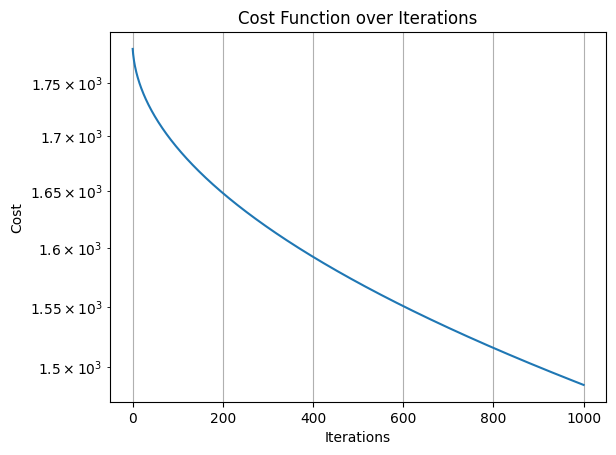

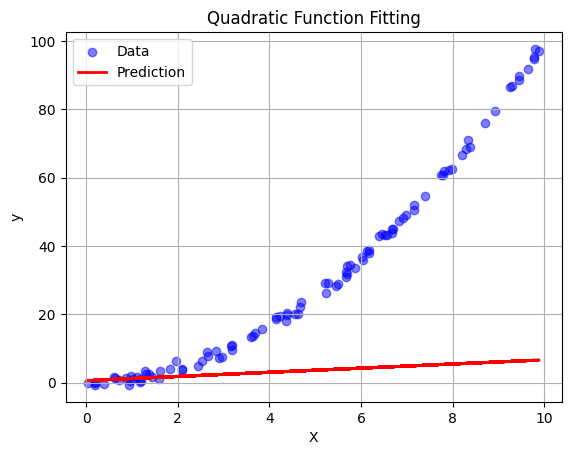

Final parameters: [0.60521536 0.60731707]


In [14]:
np.random.seed(0)  # For reproducibility
X = np.random.rand(100, 1) * 10  # 100 samples, x values in range [0, 10]
X = np.hstack((np.ones((X.shape[0], 1)), X))  # Add intercept term (bias)
y = X[:, 1] ** 2 + np.random.normal(0, 1, size=X.shape[0])  # y = x^2 + noise

# Initialize and fit the model
model = GradientDescentLinearRegression(learning_rate=0.01, max_iterations=1000, eps=1e-6)
model.fit(X, y, method="adagrad", verbose=True)

# Plot the cost over iterations
plt.plot(model.cost_hist)
plt.title('Cost Function over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.yscale('log')  # Log scale for better visualization
plt.grid()
plt.show()

# Plot the original data and the model's predictions
plt.scatter(X[:, 1], y, label='Data', color='blue', alpha=0.5)
plt.plot(X[:, 1], model.predict(X), label='Prediction', color='red', linewidth=2)
plt.title('Quadratic Function Fitting')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

# Final model parameters
print(f"Final parameters: {model.w}")